## Beräkning av Medelvärde och Standardavvikelse

In [87]:
import pandas as pd
import numpy as np

# Skapa en population av 100 slumpmässiga tal
population = pd.Series(np.random.normal(50, 10, 100))




In [88]:
# Beräkna medelvärde och standardavvikelse
average_pop = population.mean()
std_pop = population.std()
print("---------------------------")
print("Population: \n", population)
print("---------------------------")
print("Medelvärde: ", average_pop)
print("Standardavvikelse: ", std_pop)
print("---------------------------")


---------------------------
Population: 
 0     51.300122
1     63.276645
2     43.484201
3     55.993267
4     53.300291
        ...    
95    57.745885
96    54.126425
97    70.051031
98    48.640506
99    60.856929
Length: 100, dtype: float64
---------------------------
Medelvärde:  50.55204649711357
Standardavvikelse:  8.891575343844607
---------------------------


## Beräkning av Median

In [89]:
# Beräkna median från samma population som överst på sidan
median_pop = population.median()
print("Median: ", median_pop )

Median of population:  49.6507783408329


## Jämförelse av Två grupper

In [90]:
from scipy.stats import ttest_ind

# Skapa två populationer
group1 = pd.Series(np.random.normal(50, 10, 50))
group2 = pd.Series(np.random.normal(55, 10, 50))




In [91]:
# Utför t-test och skriv slutsatser
stat, p_value = ttest_ind(group1, group2)
print(f"T-test: Statistik: {stat:.3f}, P-värde: {p_value:.3f}")
if p_value > 0.05:
    print("p > 0.05 : Förkasta inte nollhypotesen. Det är ingen signifikant skillnad mellan grupperna")
elif p_value < 0.05:
    print("p < 0.05 : Förkasta nollhypotesen. Där är en signifikant skillnad mellan grupperna")

T-test: Statistik: -2.046, P-värde: 0.043
p < 0.05 : Förkasta nollhypotesen. Där är en signifikant skillnad mellan grupperna


## Val av Parametrisk eller Icke-parametrisk test

In [92]:
from scipy.stats import mannwhitneyu, shapiro

# Skapa två populationer
group1 = pd.Series(np.random.normal(50, 10, 50))
group2 = pd.Series(np.random.exponential(scale=2, size=50) + 50)



-------------------------------------------
Test av normalfördelningen via Shapiro
-------------------------------------------
En eller båda grupperna är inte normalfördelade.
Använd ett icke-parametriskt test!
Använd Mann-Whitney U-test för att jämföra medianvärdet och rangordning.
Mann-Whitney U: Statistik: 919.000, P-värde: 0.023
Signifikant skillnad mellan grupperna - förkasta nollhypotesen.
-------------------------------------------
Visualisering av data för grupp1 och grupp2
-------------------------------------------


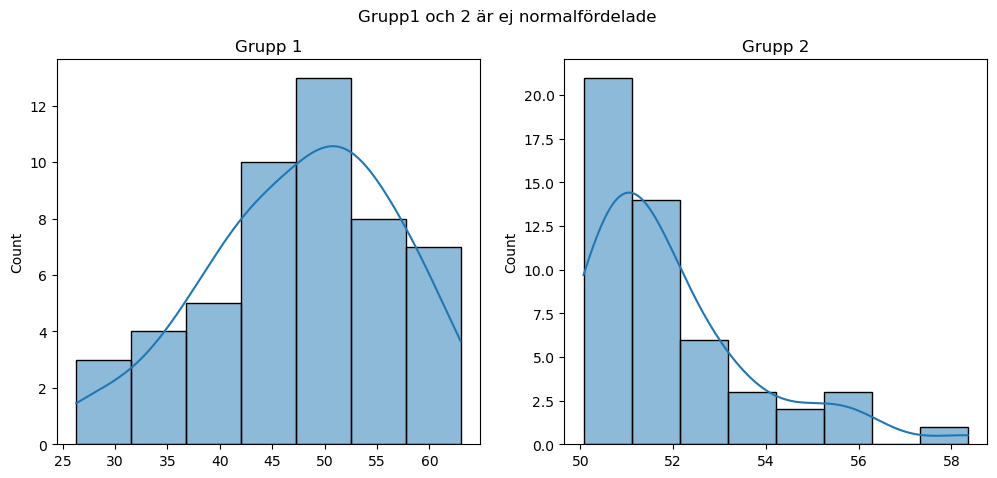

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

print("-------------------------------------------")
print("Test av normalfördelningen via Shapiro")
print("-------------------------------------------")
stat_g1, pval_g1 = shapiro(group1)
stat_g2, pval_g2 = shapiro(group2)

normal_dist = None

if pval_g1 > 0.05 and pval_g2 > 0.05:
    print("Båda grupperna är normalfördelade.") 
    print("Använd ett parametriskt test!")
    print("Använd t-test - jämför medelvärden.")
    stat, p_value = ttest_ind(group1, group2)
    print(f"T-test: Statistik: {stat:.3f}, P-värde: {p_value:.3f}")
    normal_dist = True
    if p_value > 0.05:
        print("Ingen signifikant skillnad mellan gruppernas medelvärden - förkasta ej nollhypotesen.")
    else:
        print("Signifikant skillnad mellan gruppernas medelvärden - förkasta nollhypotesen.")

else:
    print("En eller båda grupperna är inte normalfördelade.")
    print("Använd ett icke-parametriskt test!")
    print("Använd Mann-Whitney U-test för att jämföra medianvärdet och rangordning.")
    stat_mwu, pval_mwu = mannwhitneyu(group1, group2)
    normal_dist = False
    print(f"Mann-Whitney U: Statistik: {stat_mwu:.3f}, P-värde: {pval_mwu:.3f}")
    if pval_mwu > 0.05:
        print("Ingen signifikant skillnad mellan grupperna - förkasta ej nollhypotesen.")
    else:
        print("Signifikant skillnad mellan grupperna - förkasta nollhypotesen.")

print("-------------------------------------------")
print("Visualisering av data för grupp1 och grupp2")
print("-------------------------------------------")
fig, axes = plt.subplots(1,2, figsize=(12,5))

title = "Grupp1 och 2 är normalfördelade" if normal_dist else "Grupp1 och 2 är ej normalfördelade"

sns.histplot(data=group1, kde=True, ax=axes[0])
axes[0].set_title("Grupp 1")

sns.histplot(data=group2, kde=True, ax=axes[1])
axes[1].set_title("Grupp 2")

plt.suptitle(title)
plt.show()


## EXTRA: Visualisering av Data

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Skapa en population av 100 slumpmässiga tal
population = pd.Series(np.random.normal(50, 10, 100))




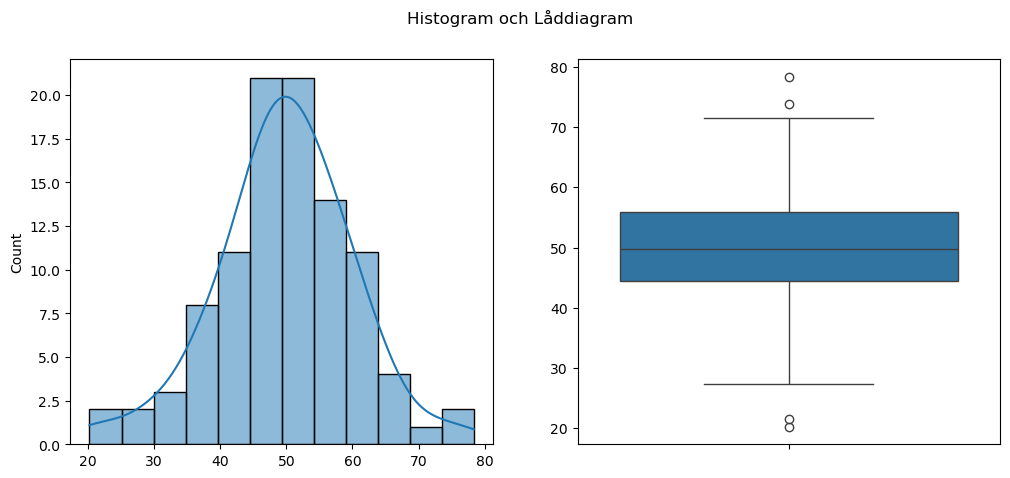

In [95]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

# Skapa Histogram
sns.histplot(population, kde=True, ax=axes[0])

# Skapa Lådagram
sns.boxplot(population, ax=axes[1])

plt.suptitle("Histogram och Låddiagram")

plt.show()
